# Task 4.10 - Python Fundamentals for Data Analysts - Part 1

### Contents List
#### 01. Import libraries
#### 02. Import and check data
#### 03. Create a regional segmentation of the data
#### 04. Exclusion flag for low-activity customers 
#### 05. Customer profiling
#### 06. Distribution of customer profiles
#### 07. Aggregate the max, mean, and min variables on a customer-profile
#### 08. Compare customer profiles with regions and departments
#### 09. Charts to illustrate your results
#### 10. Export dataframe

### 1. Import Libraries

In [1]:
#import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Import & check Data

In [2]:
#create folder path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A4\19-01-2024 Instacart Basket Analysis'

In [3]:
#import dataframe exported in Task 4.9
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
#select coloumns that are within the PII for analysis
ords_prods_pii = ['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order_price', 'spending_flag', 'order_behavior', 'order_frequecy',
        'state', 'age', 'n_dependants',
       'fam_status', 'income']

In [5]:
#create df with selected PII columns
ords_prods_all = ords_prods_all[ords_prods_pii]

In [6]:
#check data
ords_prods_all.shape

(32404859, 29)

In [7]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order_price', 'spending_flag', 'order_behavior', 'order_frequecy',
       'state', 'age', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### 3. Create a regional segmentation of the data

In [8]:
#Create state lists for every region
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [9]:
#if-statement loc () function to segment states into the 4 regions in a new 'region' comlumn
ords_prods_all.loc[ords_prods_all['state'].isin(northeast), 'region'] = 'Northeast'

In [10]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest), 'region'] = 'Midwest'

In [11]:
ords_prods_all.loc[ords_prods_all['state'].isin(south), 'region'] = 'South'

In [12]:
ords_prods_all.loc[ords_prods_all['state'].isin(west), 'region'] = 'West'

In [13]:
ords_prods_all['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### Checking for a difference in spending habits between the different U.S. regions

In [14]:
#Cross table between 'region' and 'spending_flag'
crosstab_reg_spend = pd.crosstab (ords_prods_all['spending_flag'], ords_prods_all['region'],dropna=False)

In [15]:
#display cross table
print(crosstab_reg_spend)

region         Midwest  Northeast     South     West
spending_flag                                       
High Spender    155975     108225    209691   160354
Low Spender    7441350    5614511  10582194  8132559


In [16]:
#copy crosstable to clipboard
crosstab_reg_spend.to_clipboard()

### 4. Exclusion flag for low-activity customers 

In [17]:
#create exclusion flag
ords_prods_all['exclusion_flag'] = np.where(ords_prods_all['max_order'] < 5, 'Yes', 'No')

In [18]:
#count how many customers have orders below 5 to check if flag has run correctly
ords_prods_all['max_order'].value_counts().sort_index()

max_order
1           5
2           6
3      686741
4      753543
5      793140
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171333
Name: count, Length: 99, dtype: int64

In [19]:
#check frequencies of exclusion flag
ords_prods_all['exclusion_flag'].value_counts() 

exclusion_flag
No     30964564
Yes     1440295
Name: count, dtype: int64

In [20]:
#create a sample excluding customers with orders under 5
df_excld = ords_prods_all.loc[ords_prods_all['exclusion_flag'] == 'No']

In [21]:
df_excld.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_flag,order_behavior,order_frequecy,state,age,n_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,No
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,No
2,473747,1,3,3,12,21.0,0,196,1,1,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,No
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,No
4,431534,1,5,4,15,28.0,0,196,1,1,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,No


In [22]:
#export sample
df_excld.to_pickle(os.path.join(path, '02 Data','Prepared Data','exclude_low _rev_cust.pkl'))

In [23]:
#rename df for remainder of notebook
ords_prods = df_excld

### 5. Customer profiling

In [24]:
#select to view only columns needed
ords_prods[['order_id','user_id','orders_day_of_week','order_hour_of_day','age','n_dependants','fam_status','income','order_frequecy']]

,order_id,user_id,orders_day_of_week,order_hour_of_day,age,n_dependants,fam_status,income,order_frequecy
0,2539329,1,2,8,31,3,married,40423,Non-frequent customer
1,2398795,1,3,7,31,3,married,40423,Non-frequent customer
2,473747,1,3,12,31,3,married,40423,Non-frequent customer
3,2254736,1,4,7,31,3,married,40423,Non-frequent customer
4,431534,1,4,15,31,3,married,40423,Non-frequent customer
...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,4,20,25,0,single,53755,Frequent customer
32404851,2988973,106143,2,22,25,0,single,53755,Frequent customer
32404852,930,106143,6,12,25,0,single,53755,Frequent customer
32404853,467253,106143,6,16,25,0,single,53755,Frequent customer


#### Customer profiling according to age, n_dependants and family status

In [25]:
#Young single adult is a single customer equal or below the age of 25 with no dependants
ords_prods.loc[(ords_prods['age'] <= 25) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Young Single Adult'

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_19872\3792804637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods.loc[(ords_prods['age'] <= 25) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Young Single Adult'


In [26]:
#Young married adult is a married customer equal or below the age of 25 with no dependants
ords_prods.loc[(ords_prods['age'] <= 25) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Young Married Adult'

In [27]:
#Young single parent is a single customer equal or below the age of 25 with dependants
ords_prods.loc[(ords_prods['age'] <= 25) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Young Single Parent'

In [28]:
#Young married parent is a married customer equal or below the age of 25 with dependants
ords_prods.loc[(ords_prods['age'] <= 25) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Young Married Parent'

In [29]:
#Single Adult is a single customer > 25 or <= 40 with dependants
ords_prods.loc[(ords_prods['age'] > 25) & (ords_prods['age'] <= 40) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Adult Single'

In [30]:
#Married Adult is a married customer > 25 or <= 40 with no dependants
ords_prods.loc[(ords_prods['age'] > 25) & (ords_prods['age'] <= 40) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Adult Married'

In [31]:
#Single Adult Parent is a married customer > 25 or <= 40 with dependants
ords_prods.loc[(ords_prods['age'] > 25) & (ords_prods['age'] <= 40) & (ords_prods['n_dependants']!= 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Adult Single Parent'

In [32]:
#Married Adult Parent is a married customer > 25 or <= 40 with dependants
ords_prods.loc[(ords_prods['age'] > 25) & (ords_prods['age'] <= 40) & (ords_prods['n_dependants']!= 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Adult Married Parent'

In [33]:
#Single Middle-Aged is a single customer > 40 or <= 60 with no dependants
ords_prods.loc[(ords_prods['age'] > 40) & (ords_prods['age'] <= 60) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Middle-Aged Single'

In [34]:
#Married Middle-Aged is a married customer > 40 or <= 60 with no dependants
ords_prods.loc[(ords_prods['age'] > 40) & (ords_prods['age'] <= 60) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Middle-Aged Married'

In [35]:
#Single Middle-Aged Parent is a single customer > 40 or <= 60 with dependants
ords_prods.loc[(ords_prods['age'] > 40) & (ords_prods['age'] <= 60) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Middle-Aged Single Parent'

In [36]:
#Married Middle-Aged Parent is a married customer > 40 or <= 60 with dependants
ords_prods.loc[(ords_prods['age'] > 40) & (ords_prods['age'] <= 60) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Middle-Aged Married Parent'

In [37]:
#Single Senior is a single customer > 60 with no dependants
ords_prods.loc[(ords_prods['age'] > 60) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Senior Single'

In [38]:
#Married Senior is a single customer > 60 with no dependants
ords_prods.loc[(ords_prods['age'] > 60) & (ords_prods['n_dependants'] == 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Senior Married'

In [39]:
#Single Senior Parent is a single customer > 60 with dependants
ords_prods.loc[(ords_prods['age'] > 60) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] != 'married'), 'cust_profile'] = 'Senior Single Parent'

In [40]:
#Married Senior Parent is a single customer > 60 with dependants
ords_prods.loc[(ords_prods['age'] > 60) & (ords_prods['n_dependants'] != 0) & (ords_prods['fam_status'] == 'married'), 'cust_profile'] = 'Senior Single Parent'

In [41]:
#Check distribution
ords_prods ['cust_profile'].value_counts(dropna=False)

cust_profile
Senior Single Parent          7579506
Middle-Aged Married Parent    7277203
Adult Married Parent          5456883
Senior Single                 2533101
Middle-Aged Single            2426321
Adult Single                  1827032
Young Single Parent           1481172
Young Married Parent          1430119
Young Single Adult             953227
Name: count, dtype: int64

In [42]:
# Define income brackets
ords_prods.loc[ords_prods['income'] <= 30000, 'income_bracket'] = 'Low'

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_19872\4219521207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods.loc[ords_prods['income'] <= 30000, 'income_bracket'] = 'Low'


In [43]:
ords_prods.loc[(ords_prods['income'] > 30000) & (ords_prods['income'] <= 60000), 'income_bracket'] = 'Medium-Low'

In [44]:
ords_prods.loc[(ords_prods['income'] > 60000) & (ords_prods['income'] <= 90000), 'income_bracket'] = 'Medium'

In [45]:
ords_prods.loc[(ords_prods['income'] > 90000) & (ords_prods['income'] <= 120000), 'income_bracket'] = 'Upper-Medium'

In [46]:
ords_prods.loc[(ords_prods['income'] > 120000) & (ords_prods['income'] <= 999999), 'income_bracket'] = 'High'

In [47]:
#Check frequescy
ords_prods ['income_bracket'].value_counts(dropna=False)

income_bracket
High            9179513
Upper-Medium    8650319
Medium          7331431
Medium-Low      5609169
Low              194132
Name: count, dtype: int64

In [48]:
ords_prods[['order_id','user_id','orders_day_of_week','order_hour_of_day','department_id','age','cust_profile','max_order','n_dependants','fam_status','income','income_bracket']].tail(50)

,order_id,user_id,orders_day_of_week,order_hour_of_day,department_id,age,cust_profile,max_order,n_dependants,fam_status,income,income_bracket
32404799,2164282,11534,1,11,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404800,878799,11534,2,6,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404801,3315464,11534,1,10,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404802,2698828,11534,1,13,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404803,917560,11534,1,13,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404804,490079,11534,2,6,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404805,2371958,11534,4,12,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404806,2462548,11534,1,8,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404807,1367873,11534,1,10,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium
32404808,2376815,11534,1,9,7,69,Senior Single,12,0,divorced/widowed,103023,Upper-Medium


In [49]:
#What departments does each customer profile most often purchase from?
#calculate mode department_id per cust_profile
ords_prods.groupby(['cust_profile'])['department_id'].agg(pd.Series.mode)

cust_profile
Adult Married Parent          4
Adult Single                  4
Middle-Aged Married Parent    4
Middle-Aged Single            4
Senior Single                 4
Senior Single Parent          4
Young Married Parent          4
Young Single Adult            4
Young Single Parent           4
Name: department_id, dtype: int64

4 = Produce

### 6. Distribution of customer profiles

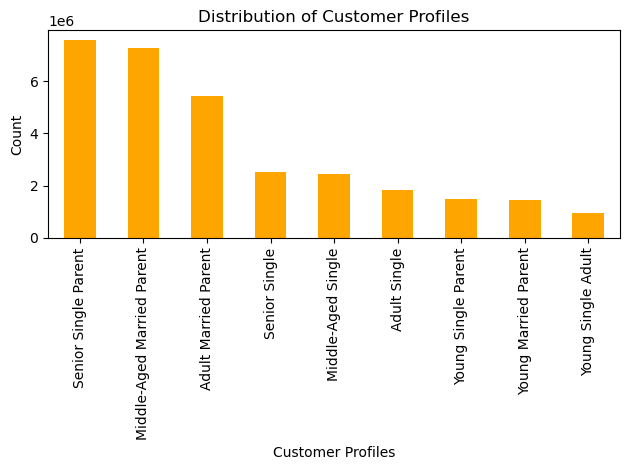

In [50]:
#Create Bar Chart to visualize distribution of customer profiles
dis_cust_prof_bar = ords_prods['cust_profile'].value_counts().plot.bar(color='orange')
plt.xlabel("Customer Profiles")
plt.ylabel("Count")
plt.title("Distribution of Customer Profiles")
plt.tight_layout()
plt.show()

In [51]:
dis_cust_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','distribution_of_customer_profiles.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile

In [52]:
#aggregate the max, mean & min on cust_profile for usage
ords_prods.groupby('cust_profile')['max_order'].agg(['mean', 'min', 'max'])

,mean,min,max
cust_profile,,,
Adult Married Parent,34.547053,5,99
Adult Single,34.277358,5,99
Middle-Aged Married Parent,34.125705,5,99
Middle-Aged Single,35.121718,5,99
Senior Single,34.764821,5,99
Senior Single Parent,34.267583,5,99
Young Married Parent,34.530568,5,99
Young Single Adult,34.068206,5,99
Young Single Parent,34.853070,5,99


In [53]:
#calculate total expenditure per user
ords_prods['total_expenditure'] = ords_prods.groupby('user_id')['prices'].transform('sum')

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_19872\912044612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods['total_expenditure'] = ords_prods.groupby('user_id')['prices'].transform('sum')


In [54]:
ords_prods[['user_id','prices','total_expenditure']].tail()

,user_id,prices,total_expenditure
32404850,106143,10.7,278.2
32404851,106143,10.7,278.2
32404852,106143,10.7,278.2
32404853,106143,10.7,278.2
32404854,106143,10.7,278.2


In [55]:
#aggregate the max, mean & min on cust_profile for expenditure
ords_prods.groupby('cust_profile')['total_expenditure'].agg(['mean', 'min', 'max'])

,mean,min,max
cust_profile,,,
Adult Married Parent,3485.072303,7.0,22696.9
Adult Single,3379.267496,12.0,18883.2
Middle-Aged Married Parent,3369.289336,10.4,21509.2
Middle-Aged Single,3452.123509,5.0,20315.1
Senior Single,3474.963678,15.7,24307.1
Senior Single Parent,3394.419281,6.8,26394.9
Young Married Parent,3444.450536,12.0,18436.9
Young Single Adult,3335.804936,10.5,17585.8
Young Single Parent,3459.618715,14.4,16048.1


### 8. Compare customer profiles with regions and departments

In [56]:
#Cross table between 'cust_profile'and 'region'
ct_cust_profile = pd.crosstab (ords_prods['cust_profile'], ords_prods['region'],dropna=False)

In [57]:
ct_cust_profile

region,Midwest,Northeast,South,West
cust_profile,,,,
Adult Married Parent,1259816,956147,1846151,1394769
Adult Single,433233,317829,613888,462082
Middle-Aged Married Parent,1732159,1297167,2379471,1868406
Middle-Aged Single,581380,404620,795411,644910
Senior Single,594878,460190,838254,639779
Senior Single Parent,1761892,1348823,2522975,1945816
Young Married Parent,333395,251636,475152,369936
Young Single Adult,213325,171843,334380,233679
Young Single Parent,351435,256430,505457,367850


In [58]:
#Cross table between 'cust_profile' and department_id
ct_cust_deprt = pd.crosstab (ords_prods['cust_profile'], ords_prods['department_id'],dropna=False)

In [59]:
ct_cust_deprt

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
cust_profile,,,,,,,,,,,,,,,,,,,,,
Adult Married Parent,371237,5994,195911,1608114,26042,45589,445064,15502,144300,5992,...,118348,313248,117240,179012,917040,122506,71679,492432,176579,11168
Adult Single,123082,2155,66714,536406,8581,15232,152002,5452,47701,1805,...,38260,103669,39317,60498,307814,41145,24751,162969,60238,4019
Middle-Aged Married Parent,497952,7979,263689,2125637,32906,60077,610094,21683,194438,7832,...,159354,421487,158661,238058,1212782,166153,97151,649646,234131,15510
Middle-Aged Single,166204,2740,88624,714993,12282,20141,201711,7235,63847,2587,...,51804,140269,52616,78709,404109,53260,32558,215410,79364,4985
Senior Single,176375,2726,91656,742363,11443,20853,211565,7851,67251,2557,...,55190,145080,54213,80818,424351,56041,33183,226796,83097,4849
Senior Single Parent,520991,8361,274361,2224034,34185,61725,633122,22719,200401,8372,...,167245,436866,163326,248667,1263593,173938,99836,673537,245870,15854
Young Married Parent,99210,1548,51788,415508,6288,11745,119173,4216,39159,1622,...,31612,81355,31993,46840,239184,32553,19017,129043,45753,2984
Young Single Adult,63687,1093,34401,281679,4521,8235,80063,3064,25497,1051,...,20624,54886,20286,30995,158102,20912,12836,85263,30683,2082
Young Single Parent,102993,1815,53684,430539,8379,12394,119107,5338,39542,1633,...,32344,85845,33198,48477,250207,33349,19381,131310,48119,3317


In [60]:
ct_cust_deprt.to_clipboard()

In [61]:
#Cross table between 'cust_profile' and 'income_bracket'
ct_cust_income = pd.crosstab (ords_prods['cust_profile'], ords_prods['income_bracket'],dropna=False)[['High', 'Upper-Medium', 'Medium', 'Medium-Low', 'Low']]

In [62]:
ct_cust_income

income_bracket,High,Upper-Medium,Medium,Medium-Low,Low
cust_profile,,,,,
Adult Married Parent,69450,861609,2765987,1672390,87447
Adult Single,19679,300048,914631,560660,32014
Middle-Aged Married Parent,3305819,2518584,622609,824560,5631
Middle-Aged Single,1132418,812218,208623,270803,2259
Senior Single,1158199,879663,221979,270956,2304
Senior Single Parent,3446014,2629863,662423,832959,8247
Young Married Parent,18523,243980,705000,441990,20626
Young Single Adult,11210,154322,480373,291715,15607
Young Single Parent,18201,250032,749806,443136,19997


In [63]:
ct_cust_income.to_clipboard()

In [64]:
#Cross table between 'region' and 'income_bracket'
ct_region_income = pd.crosstab(ords_prods['income_bracket'], ords_prods['region'], dropna=False)

In [65]:
ct_region_income

region,Midwest,Northeast,South,West
income_bracket,,,,
High,2188923,1628878,3023406,2338306
Low,53250,33144,65230,42508
Medium,1705538,1276852,2458276,1890765
Medium-Low,1287846,986990,1901305,1433028
Upper-Medium,2025956,1538821,2862922,2222620


In [66]:
ct_region_income.to_clipboard()

In [87]:
#Cross table between 'region' and 'department_id'
ct_reg_deprt = pd.crosstab (ords_prods['region'], ords_prods['department_id'],dropna=False)

In [68]:
ct_reg_deprt

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
Northeast,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914616,124604,72712,493154,178398,11512
South,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,...,224120,591754,223172,337458,1723016,230061,139511,916780,333620,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


In [88]:
#Crosstable of products by customer profile
ct_cust_prod = pd.crosstab (ords_prods['cust_profile'], ords_prods['product_name'],dropna=False)

In [89]:
ct_cust_prod

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,#NAME?,& Go! Hazelnut Spread + Pretzel Sticks,'Swingtop' Premium Lager,(70% Juice!) Mountain Raspberry Juice Squeeze,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
cust_profile,,,,,,,,,,,,,,,,,,,,,
Adult Married Parent,174,2,0,57,7,33,0,3,2,13,...,0,59,5,3,30,8,7,6,7,16
Adult Single,38,1,0,12,0,1,0,0,0,3,...,1,3,7,0,34,0,3,15,4,5
Middle-Aged Married Parent,165,1,2,67,8,49,0,0,1,30,...,1,30,16,3,19,3,8,17,4,9
Middle-Aged Single,67,4,0,12,5,11,0,0,0,3,...,0,42,1,1,5,0,13,1,1,5
Senior Single,53,1,1,19,5,3,0,4,0,6,...,6,9,0,1,13,1,3,6,1,1
Senior Single Parent,171,4,3,40,1,25,1,12,2,34,...,13,16,11,0,48,15,13,13,3,11
Young Married Parent,29,0,1,3,2,19,0,0,0,2,...,1,27,0,10,5,1,4,7,0,1
Young Single Adult,35,0,1,10,0,5,0,0,1,0,...,0,1,5,1,2,2,0,0,1,0
Young Single Parent,21,0,0,8,0,5,0,5,1,0,...,0,2,2,0,20,1,3,3,1,4


In [100]:
#Transpose crosstable
ct_cust_prod_t = ct_cust_prod.T

In [101]:
ct_cust_prod_t

cust_profile,Adult Married Parent,Adult Single,Middle-Aged Married Parent,Middle-Aged Single,Senior Single,Senior Single Parent,Young Married Parent,Young Single Adult,Young Single Parent
product_name,,,,,,,,,
#2 Coffee Filters,174,38,165,67,53,171,29,35,21
#2 Cone White Coffee Filters,2,1,1,4,1,4,0,0,0
#2 Mechanical Pencils,0,0,2,0,1,3,1,1,0
#4 Natural Brown Coffee Filters,57,12,67,12,19,40,3,10,8
#NAME?,7,0,8,5,5,1,2,0,0
...,...,...,...,...,...,...,...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,8,0,3,0,1,15,1,2,1
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,7,3,8,13,3,13,4,0,3
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,6,15,17,1,6,13,7,0,3


In [103]:
#copy cross table to excel for furthe analysis
ct_cust_prod_t.to_clipboard()

In [107]:
#Crosstable of spending flags per customer profile
ct_avgord_cust = pd.crosstab (ords_prods['cust_profile'], ords_prods['spending_flag'],dropna=False)

In [108]:
ct_avgord_cust

spending_flag,High Spender,Low Spender
cust_profile,,
Adult Married Parent,107440,5349443
Adult Single,28902,1798130
Middle-Aged Married Parent,143830,7133373
Middle-Aged Single,49779,2376542
Senior Single,49737,2483364
Senior Single Parent,149735,7429771
Young Married Parent,28452,1401667
Young Single Adult,17624,935603
Young Single Parent,27926,1453246


In [109]:
#copy cross table to excel for furthe analysis
ct_avgord_cust.to_clipboard()

### 9. Charts to illustrate your results

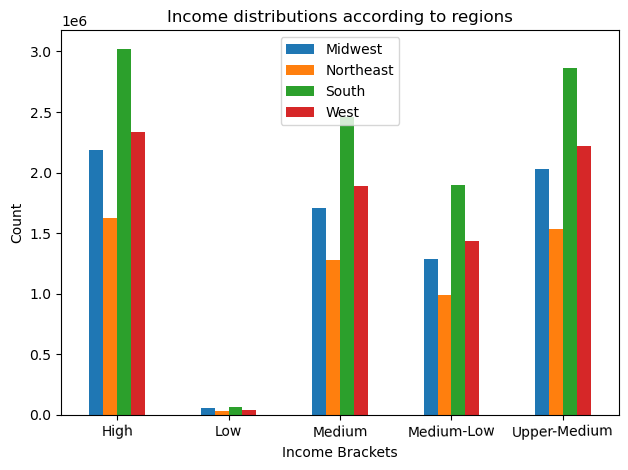

In [69]:
#Income distributions according to regions
inc_reg_bar = ct_region_income.plot(kind="bar", stacked=False, rot=1)
plt.xlabel("Income Brackets")
plt.ylabel("Count")
plt.title("Income distributions according to regions")
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [70]:
inc_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','income_region_distr.png'))

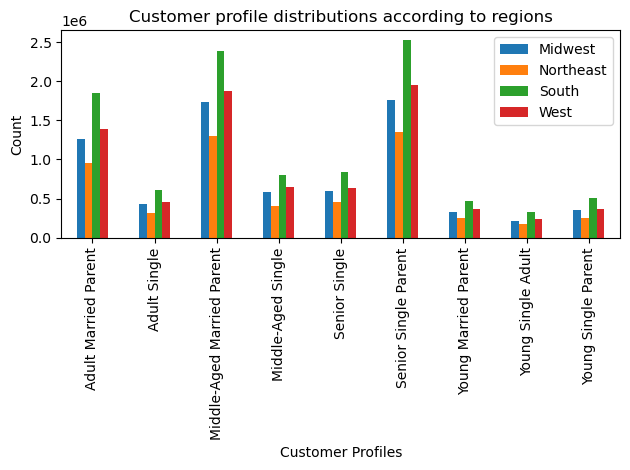

In [71]:
#Customer profile distributions according to regions
cust_reg_bar = ct_cust_profile.plot.bar()
plt.xlabel("Customer Profiles")
plt.ylabel("Count")
plt.title("Customer profile distributions according to regions")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [72]:
#Export Visualization
cust_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','cust_reg_distri.png'))

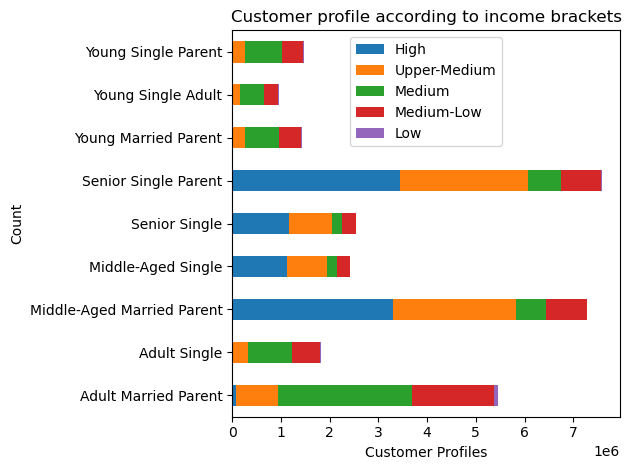

In [73]:
#Customer profile distributions according to income brackets
cust_income_bar = ct_cust_income.plot.barh(stacked = 'true')
plt.xlabel("Customer Profiles")
plt.ylabel("Count")
plt.title("Customer profile according to income brackets")
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [74]:
#Export Visualization
cust_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','cust_income_distri.png'))

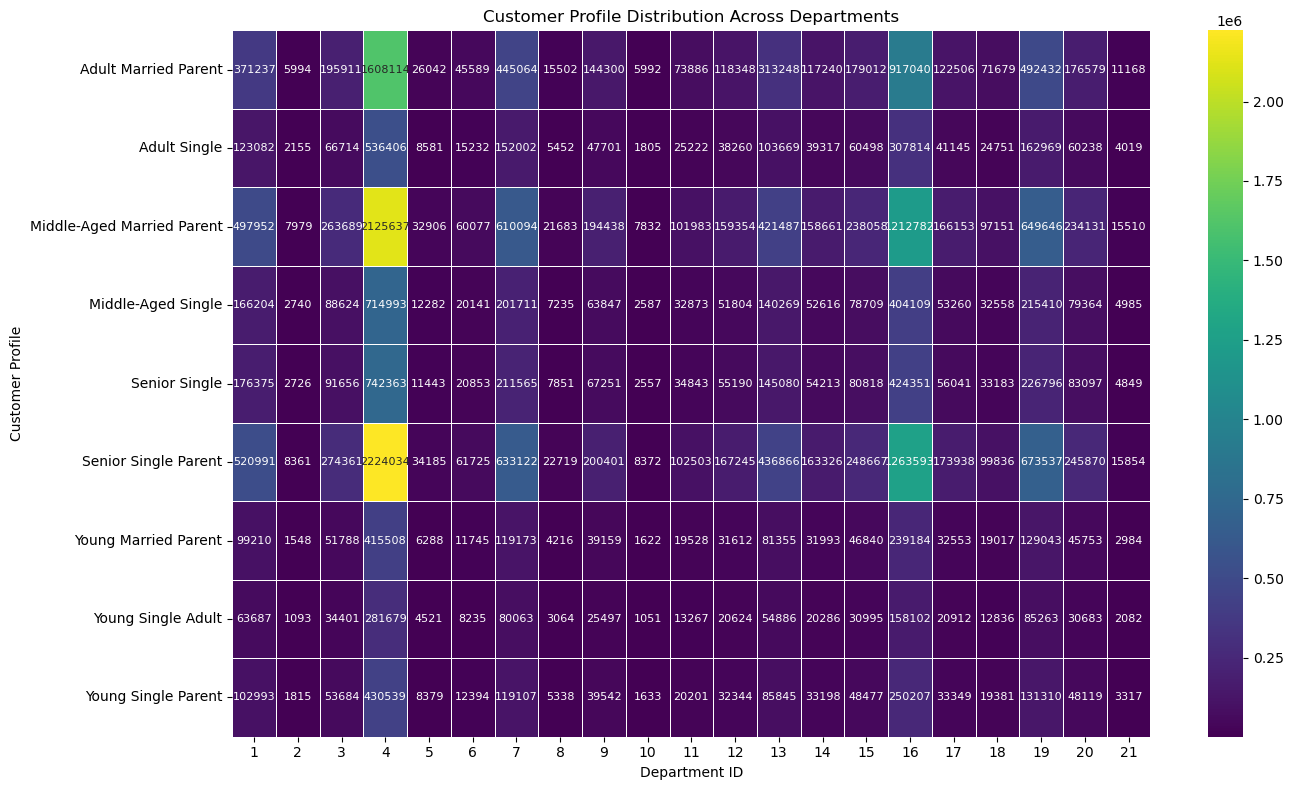

In [75]:
# Heat map to show customer distribution across departments 
cust_depart_heatmap = plt.figure(figsize=(14, 8))
sns.heatmap(ct_cust_deprt, cmap='viridis', annot=True, fmt='d', linewidths=.5, annot_kws={"fontsize": 8})
plt.title('Customer Profile Distribution Across Departments')
plt.xlabel('Department ID')
plt.ylabel('Customer Profile')
plt.tight_layout()
plt.show()

In [76]:
#Export Visualization
cust_depart_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Customer Profile Distribution Across Departments.png'))

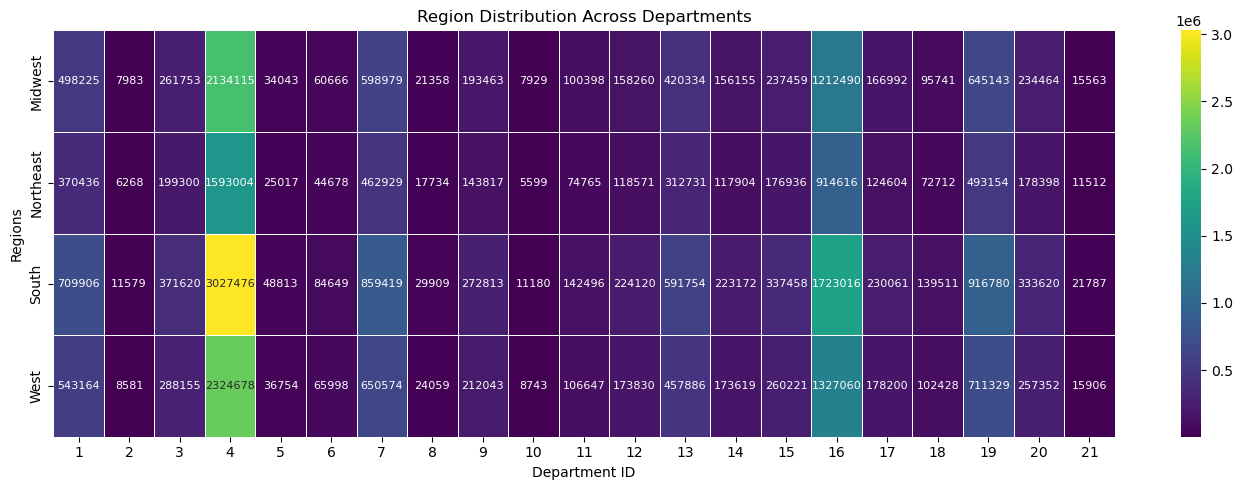

In [77]:
# Heat map to show region distribution across departments 
reg_depart_heatmap = plt.figure(figsize=(14, 5))
sns.heatmap(ct_reg_deprt, cmap='viridis', annot=True, fmt='d', linewidths=.5, annot_kws={"fontsize": 8})
plt.title('Region Distribution Across Departments')
plt.xlabel('Department ID')
plt.ylabel('Regions')
plt.tight_layout()
plt.show()

Top 5 Department_id's detail: 4 = Produce; 16 = Dairy & Eggs; 19 = Snacks; 7 = Beverages; 1 = Frozen

Customers seem to behave similarly accross all regions with a higher portion of the Instacart customers in the South region. The South region customers have a higher income bracket compared to other regions.

In [78]:
#Export Visualization
reg_depart_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Region Distribution Across Departments.png'))

### 10. Export dataframe

In [79]:
#Check Data
ords_prods.shape

(30964564, 34)

In [80]:
ords_prods.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order_price', 'spending_flag', 'order_behavior', 'order_frequecy',
       'state', 'age', 'n_dependants', 'fam_status', 'income', 'region',
       'exclusion_flag', 'cust_profile', 'income_bracket',
       'total_expenditure'],
      dtype='object')

In [81]:
ords_prods.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,state,age,n_dependants,fam_status,income,region,exclusion_flag,cust_profile,income_bracket,total_expenditure
32404850,3308056,106143,22,4,20,10.0,0,19675,1,1,...,Hawaii,25,0,single,53755,West,No,Young Single Adult,Medium-Low,278.2
32404851,2988973,106143,23,2,22,5.0,0,19675,1,1,...,Hawaii,25,0,single,53755,West,No,Young Single Adult,Medium-Low,278.2
32404852,930,106143,24,6,12,4.0,0,19675,1,1,...,Hawaii,25,0,single,53755,West,No,Young Single Adult,Medium-Low,278.2
32404853,467253,106143,25,6,16,7.0,0,19675,1,1,...,Hawaii,25,0,single,53755,West,No,Young Single Adult,Medium-Low,278.2
32404854,156685,106143,26,4,23,5.0,0,19675,1,1,...,Hawaii,25,0,single,53755,West,No,Young Single Adult,Medium-Low,278.2


In [82]:
#Export Data
ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data','final_instacart.pkl'))